In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


df = pd.read_csv("Diabetes Classification.csv")

df.shape

(128, 11)

In [94]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Blood Pressure', 'FBS', 'HbA1c',
       'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise',
       'Diagnosis'],
      dtype='object')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         128 non-null    int64  
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  128 non-null    object 
 7   Smoking                     128 non-null    object 
 8   Diet                        128 non-null    object 
 9   Exercise                    128 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.1+ KB


In [96]:
df.describe()

,Age,BMI,FBS,HbA1c
count,128.000000,128.000000,128.000000,128.000000
mean,42.031250,35.359375,162.500000,7.887500
std,16.783915,14.981739,61.323975,2.146339
min,12.000000,10.000000,80.000000,5.000000
25%,28.000000,24.000000,120.000000,6.400000
50%,40.000000,34.000000,160.000000,7.800000
75%,55.000000,45.500000,205.000000,9.375000
max,75.000000,67.000000,280.000000,12.000000


In [97]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


# Encode categorical features

In [99]:
label_encoders = {}
categorical_cols = ['Gender', 'Blood Pressure', 'Family History of Diabetes',
                    'Smoking', 'Diet', 'Exercise', 'Diagnosis']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target

In [101]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Train-test split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features


In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier

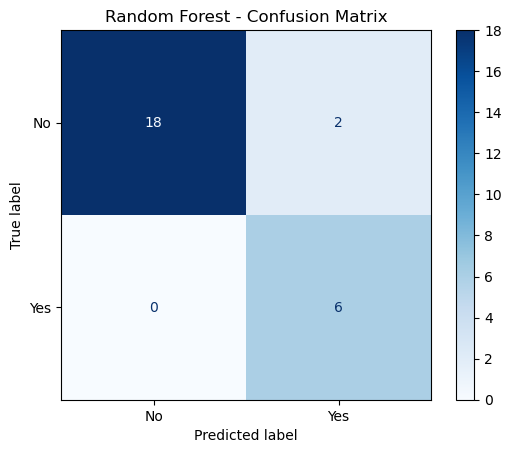

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=label_encoders['Diagnosis'].classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Random Forest - Confusion Matrix")
plt.show()


# Logistic Regression

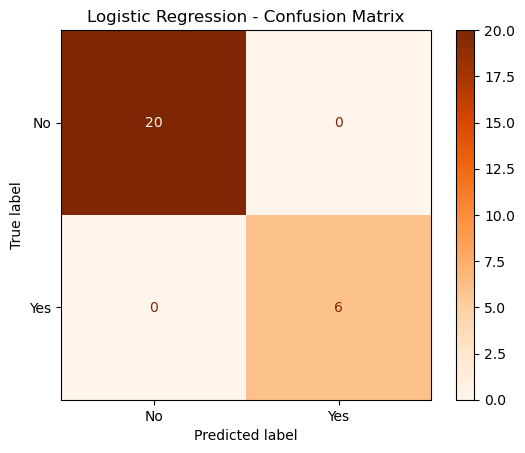

In [109]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(cm_lr, display_labels=label_encoders['Diagnosis'].classes_)
disp_lr.plot(cmap=plt.cm.Oranges)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


 # Artificial Neural Network (ANN)

Epoch 1/20


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - accuracy: 0.7554 - loss: 0.5591 - val_accuracy: 0.7143 - val_loss: 0.5237
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7912 - loss: 0.5333 - val_accuracy: 0.7143 - val_loss: 0.5150
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7678 - loss: 0.5333 - val_accuracy: 0.7143 - val_loss: 0.5066
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7694 - loss: 0.5136 - val_accuracy: 0.7143 - val_loss: 0.4991
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7538 - loss: 0.5135 - val_accuracy: 0.7143 - val_loss: 0.4920
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7772 - loss: 0.4785 - val_accuracy: 0.7143 - val_loss: 0.4852
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7694 - loss: 0.4756 - val_accuracy: 0.7143 - val_loss: 0.4787
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7812 - loss: 0.4586 - val_accuracy: 0.7143 - val_loss: 0.4724
Epoc

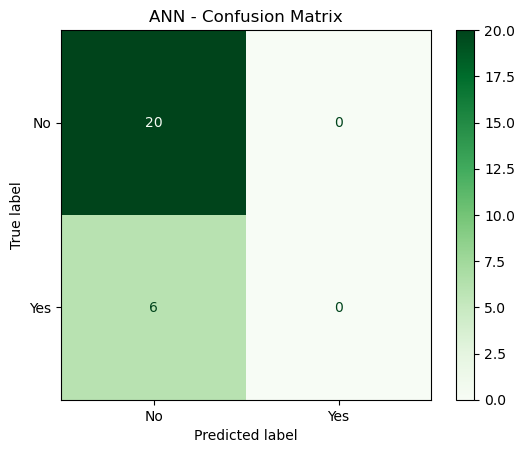

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ann_model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_pred_ann_prob = ann_model.predict(X_test_scaled)
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int).flatten()

cm_ann = confusion_matrix(y_test, y_pred_ann)
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=label_encoders['Diagnosis'].classes_)
disp_ann.plot(cmap=plt.cm.Greens)
plt.title("ANN - Confusion Matrix")
plt.show()


In [23]:

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


print("Columns:", df.columns)


X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


smote = SMOTE(random_state=42)


X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_smote.value_counts())




Columns: Index(['Age', 'Gender', 'BMI', 'Blood Pressure', 'FBS', 'HbA1c',
       'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise',
       'Diagnosis'],
      dtype='object')
Before SMOTE:
Diagnosis
No     77
Yes    25
Name: count, dtype: int64

After SMOTE:
Diagnosis
No     77
Yes    77
Name: count, dtype: int64
